
# Project: No-show Appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. In our analysis we will try to answer the following questions:
> - Which features are associated with the No-show appointments?
> - Does the Neighbourhood has any impact on the show status?
> - Does the the Scheduled and appointment dates have any impact on the show status?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#Loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning (Removing Duplicates and renaming the columns)

There are some actions need to be applied on our data in order to be clean, which are the following:
 - Dropping the useless columns 
 - Updating the date columns (ScheduledDay. & AppointmentDay) to date time format
 - Checking for duplicates & remove any duplicates 
 - Renaming the columns name, by make all of them lower case and use _ as a word separator



#### Dropping the useless columns

In [4]:
df.drop(['PatientId', 'AppointmentID'], inplace=True, axis=1)

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [20]:
type(df.ScheduledDay[1])

str

In [27]:
type(df.AppointmentDay[1])

str

In [11]:
df.shape

(110527, 12)

In [12]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

#### Updating the date columns to date time format

In [29]:
df.AppointmentDay= pd.to_datetime(df.AppointmentDay)

In [31]:
df.ScheduledDay= pd.to_datetime(df.ScheduledDay)

In [32]:
type(df.AppointmentDay[1])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
type(df.ScheduledDay[1])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
#checking the date format is ok
df.ScheduledDay.head(10)

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
5   2016-04-27 08:36:51+00:00
6   2016-04-27 15:05:12+00:00
7   2016-04-27 15:39:58+00:00
8   2016-04-29 08:02:16+00:00
9   2016-04-27 12:48:25+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [36]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
df.nunique()

gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handcap                 5
sms_received            2
no_show                 2
dtype: int64

In [40]:
df.Scholarship.unique()

array([0, 1])

In [41]:
df.Hipertension.unique()

array([1, 0])

In [42]:
df.Diabetes.unique()

array([0, 1])

In [43]:
df.Alcoholism.unique()

array([0, 1])

In [44]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [45]:
df.SMS_received.unique()

array([0, 1])

#### Checking for duplicates

In [50]:
df.duplicated().value_counts()

False    109892
True        635
dtype: int64

There are 635 duplicate rows, so we have to drop them

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.shape

(109892, 12)

#### Renaming the columns name

In [64]:
#make them all lowercase and updating the - to be _
df.rename(columns=lambda x: x.strip().lower().replace('day', '_day').replace('-','_'), inplace=True);

- All the above columns are the needed columns and will be used for analysis
- there is no missing values 
- The formatting for all the fields are fine
- The duplicate rows have been removed
- All the columns name has a good representation

No further actions are needed to clean the data

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which features are associated with the No-show appointments)

We will split our dataset into two parts to check the histogram of each part, trying to find a relation between the no-show and the existing features


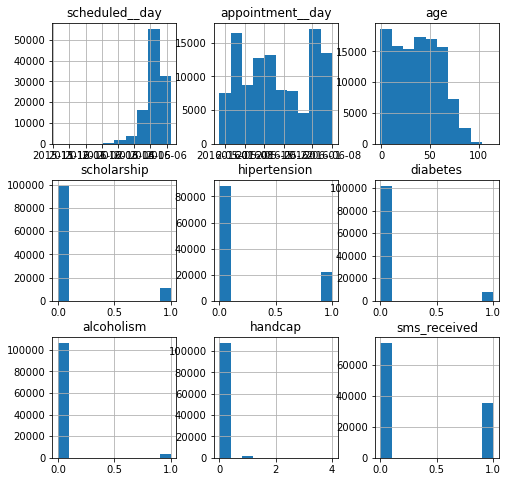

In [66]:
df.hist(figsize=(8,8));

In [115]:
show = df.no_show == 'No'
show.nunique()

2

In [116]:
no_show = df.no_show == 'Yes'
no_show.head()

0    False
1    False
2    False
3    False
4    False
Name: no_show, dtype: bool

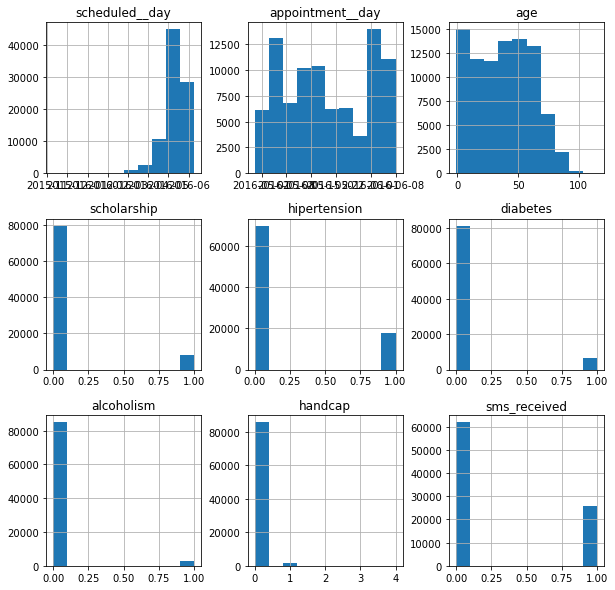

In [117]:
df[show].hist(figsize=(10,10));

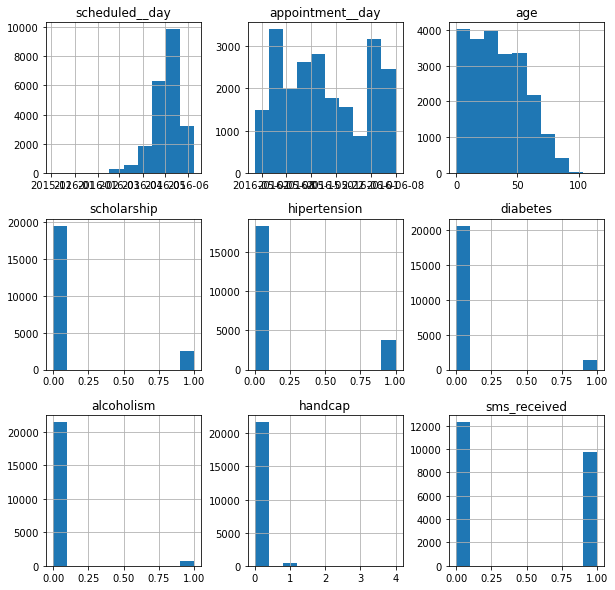

In [118]:
df[no_show].hist(figsize=(10, 10));

The distribution for both features are almost the same except for SMS_Receied, lets check more relations

In [119]:
df[show].describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,87794.000000,87794.000000,87794.000000,87794.000000,87794.000000,87794.000000,87794.000000
mean,37.795681,0.093913,0.204433,0.073707,0.030480,0.022633,0.292708
std,23.350062,0.291709,0.403289,0.261294,0.171906,0.162000,0.455008
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [120]:
df[no_show].describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,22098.000000,22098.000000,22098.000000,22098.00000,22098.000000,22098.000000,22098.000000
mean,34.283917,0.115667,0.168703,0.06435,0.030229,0.020138,0.442755
std,21.965982,0.319832,0.374498,0.24538,0.171221,0.156331,0.496723
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


#### Checking the relation between the sms received and the show status

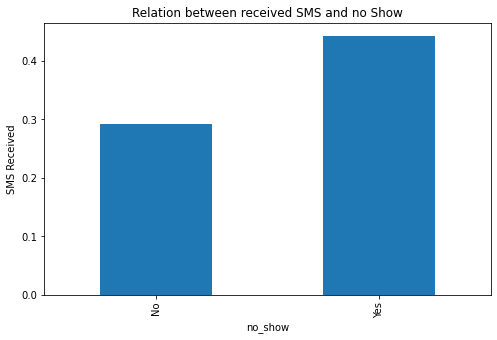

In [121]:
df.groupby('no_show').sms_received.mean().plot(ylabel='SMS Received', kind='bar', figsize=(8,5),title='Relation between received SMS and no Show');

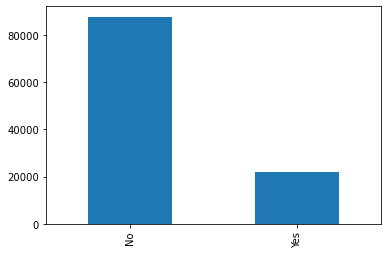

In [122]:
df.no_show.value_counts().plot(kind='bar');

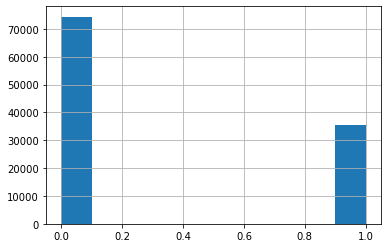

In [123]:
#checking the number of the sent SMS
df.sms_received.hist();

From the above statistics we reached to the following conclusion:
- Number of the SMS received is less than the not received
- Number of no show is less than show cases
- Most of the no show cases received SMS
- Most of the show cases, didn't receive SMS

So we might have an issue in the sent SMS content, and it may cause a conflict that make the patients didn't show on time



### Research Question 2  (Does the Neighbourhood has any impact on the show status)

Will start by checking if there is a unique Neighbourhood(s) that has/have unique pattern, by comparing the neighbourhoods of both the show and no-show cases

In [128]:
df.neighbourhood.nunique()

81

In [129]:
df[no_show].neighbourhood.nunique()

80

In [130]:
df[show].neighbourhood.nunique()

80

In [142]:
np.intersect1d(df[no_show].neighbourhood.unique(),df[show].neighbourhood.unique()).size

79

The numbers are almost the same for the two cases, we will check the count of each case per neighbourhood, trying to figure out if there is a huge number for one of the existing neighbourhoods.

In [145]:
df[no_show].neighbourhood.value_counts()

JARDIM CAMBURI                 1429
MARIA ORTIZ                    1219
ITARARÉ                         902
RESISTÊNCIA                     885
JESUS DE NAZARETH               695
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

In [146]:
df[show].neighbourhood.value_counts()

JARDIM CAMBURI       6187
MARIA ORTIZ          4585
RESISTÊNCIA          3502
JARDIM DA PENHA      3242
CENTRO               2615
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

In [147]:
df[show].neighbourhood.value_counts()['ITARARÉ']

2568

In [148]:
df[no_show].neighbourhood.value_counts()['RESISTÊNCIA']

885

From the above data it seems that the top neighbourhood for each cases are common, so the neighbourhood don't has any impact on the no_show status.



### Research Question 3  (Does the the Scheduled and appointment dates have any impact on the show status)

In the following analysis we will try to figure out if there is any relation between the show and the no-show cases and the time gab between the Scheduled and appointment dates.

In [157]:
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [170]:
df['delta']= df.appointment_day - df.appointment_day


In [175]:
df.delta.value_counts()

0 days    109892
Name: delta, dtype: int64

All the appointments have the same date same as the scheduled, in the next step will try to figure out if there is huge number of appointments made in singe date.

In [178]:
df.scheduled_day.value_counts()

2016-05-06 07:09:53+00:00    23
2016-05-06 07:09:54+00:00    23
2016-04-25 17:18:27+00:00    22
2016-04-25 17:17:46+00:00    22
2016-04-25 17:17:23+00:00    19
                             ..
2016-05-11 09:14:49+00:00     1
2016-05-20 10:28:54+00:00     1
2016-04-26 13:09:23+00:00     1
2016-05-16 12:24:23+00:00     1
2016-05-16 07:33:01+00:00     1
Name: scheduled_day, Length: 103549, dtype: int64

All the data has the same date for Scheduled and appointment date, and even the distribution accross the appointment date are almost the same

<a id='conclusions'></a>
## Conclusions



From the above analysis it seems that there is a conflict causes by the SMS content, as the majority in the appointments that received  the SMS is no-show, and on the other hand the majority of the appointments that didn’t received  the SMS is to show. Also, from our analysis we found that there is no any Association between the scheduled/appointment  date or even the neighbourhood and the show status.